In [1]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import requests
import json

In [2]:
#file path
#Import clean csv file
project_df_path = "Data/merge.csv"
project_df = pd.read_csv(project_df_path)
project_df.head()

,Year_HS,Overall rank_HS,Country or region_HS,Score_HS,GDP per capita_HS,Social support_HS,Healthy life expectancy_HS,Freedom to make life choices_HS,Generosity_HS,Perceptions of corruption_HS,...,Satisfied demand for contraception (% of women)_SP,Equality of political power by socioeconomic position (0=unequal power; 4=equal power)_SP,Equality of political power by social group (0=unequal power; 4=equal power)_SP,Equality of political power by gender (0=unequal power; 4=equal power)_SP,Discrimination and violence against minorities (0=low; 10=high)_SP,Acceptance of gays and lesbians (0=low; 100=high)_SP,Quality weighted universities (points)_SP,Citable documents_SP,Women with advanced education (%)_SP,Years of tertiary schooling_SP
0,2019,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,...,90.3,3.195,3.428,2.764,1.2,0.79,42.4,3.5186,0.8919,4.2892
1,2019,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,...,87.6,3.544,3.750,3.318,4.3,0.88,29.8,4.5731,0.9135,4.1745
2,2019,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,...,88.5,3.384,3.396,3.363,3.3,0.90,31.4,4.1070,0.9434,4.0184
3,2019,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,...,88.5,3.113,2.772,2.746,4.2,0.90,62.2,3.2448,0.9065,4.1465
4,2019,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343,...,88.7,2.958,3.449,2.866,3.3,0.79,49.0,5.1351,0.9103,2.8077


In [3]:
#see dataframe column as a list
#project_df.columns.tolist()

In [4]:
#number of participating countries
project_df["Country or region_HS"].unique()

array(['Finland', 'Denmark', 'Norway', 'Netherlands', 'Switzerland',
       'Sweden', 'New Zealand', 'Canada', 'Austria', 'Australia',
       'Costa Rica', 'Israel', 'United Kingdom', 'Ireland', 'Germany',
       'Belgium', 'United States', 'Mexico', 'France', 'Chile',
       'Guatemala', 'Spain', 'Panama', 'Brazil', 'Uruguay', 'El Salvador',
       'Italy', 'Slovakia', 'Poland', 'Lithuania', 'Colombia', 'Slovenia',
       'Argentina', 'Romania', 'Ecuador', 'Latvia', 'Estonia', 'Jamaica',
       'Mauritius', 'Honduras', 'Kazakhstan', 'Hungary', 'Peru',
       'Portugal', 'Pakistan', 'Russia', 'Philippines', 'Serbia',
       'Montenegro', 'Croatia', 'Dominican Republic', 'Turkey',
       'Malaysia', 'Belarus', 'Greece', 'Mongolia', 'Kyrgyzstan',
       'Azerbaijan', 'Indonesia', 'Cameroon', 'Ghana', 'Nepal', 'Benin',
       'South Africa', 'Albania', 'Senegal', 'Burkina Faso', 'Armenia',
       'Georgia', 'Sri Lanka', 'Myanmar', 'Ukraine', 'India', 'Lesotho',
       'Rwanda', 'Tanzania'

In [5]:
#suppress warning
import warnings
warnings.simplefilter("ignore")

In [6]:
#Get ranking and totals data
totals_df = project_df[['Year_HS', 'Country_SP', 'Overall rank_HS', 'Score_HS', 'SPI Rank_SP',  'Social Progress Index_SP']]

#Rename year and country columns
totals_df.rename(columns = {"Year_HS":"Year", "Country_SP":"Country"}, inplace = True)

#configure SPI ranking to not have a decimal
totals_df["SPI Rank_SP"] = totals_df["SPI Rank_SP"].astype(int)

#renaming columns to get rid of spaces
totals_df.rename(columns={"Overall rank_HS":"Rank_HS"}, inplace=True)
totals_df.rename(columns={"SPI Rank_SP":"Rank_SPI"}, inplace=True)

In [7]:
#Top Rankings of Happiness Score
#ranking_HS = totals_df.sort_values(["Year","Rank_HS"])
#ranking_HS

In [8]:
#Top Rankings of Social Progress Index
#ranking_SP = totals_df.sort_values(["Year","Rank_SPI"])
#ranking_SP

In [9]:
ranking_both_top10 = totals_df[(totals_df["Rank_HS"] <= 10) & (totals_df["Rank_SPI"] <= 10)]
#use \ (vertical bar for either condiation)
ranking_both_top10

,Year,Country,Rank_HS,Score_HS,Rank_SPI,Social Progress Index_SP
0,2019,Finland,1,7.769,4,91.94
1,2019,Denmark,2,7.600,2,92.08
2,2019,Norway,3,7.554,1,93.08
3,2019,Netherlands,5,7.488,10,91.16
4,2019,Switzerland,6,7.480,6,91.52
5,2019,Sweden,7,7.343,7,91.32
6,2019,New Zealand,8,7.307,5,91.62
7,2019,Canada,9,7.278,8,91.26
76,2018,Finland,1,7.632,4,91.82
77,2018,Norway,2,7.594,1,92.87


In [10]:
ranking_HS = ranking_both_top10.sort_values(["Rank_HS"])

In [11]:
ranking_SPI = ranking_both_top10.sort_values(["Rank_SPI"])
#ranking_SPI

In [12]:
ranking_country = ranking_both_top10.sort_values(["Country"])
ranking_country

,Year,Country,Rank_HS,Score_HS,Rank_SPI,Social Progress Index_SP
84,2018,Australia,10,7.272,7,91.29
159,2017,Australia,10,7.284,9,90.86
7,2019,Canada,9,7.278,8,91.26
81,2018,Canada,7,7.328,10,90.95
78,2018,Denmark,3,7.555,3,92.01
1,2019,Denmark,2,7.600,2,92.08
152,2017,Denmark,2,7.522,2,92.27
299,2015,Denmark,3,7.527,2,91.71
226,2016,Denmark,1,7.526,3,91.57
229,2016,Finland,5,7.413,2,91.77


In [13]:
ranking_top10 = ranking_both_top10.groupby(["Country","Rank_HS","Rank_SPI"])
ranking_top10.count()

Year  Score_HS  Social Progress Index_SP
Country     Rank_HS Rank_SPI                                          
Australia   10      7            1         1                         1
                    9            1         1                         1
Canada      7       10           1         1                         1
            9       8            1         1                         1
Denmark     1       3            1         1                         1
            2       2            2         2                         2
            3       2            1         1                         1
                    3            1         1                         1
Finland     1       4            2         2                         2
            5       2            1         1                         1
                    3            1         1                         1
            6       1            1         1                         1
Netherlands 5       10           1         1                         1
            6       5            1         1                         1
                    8            1         1                         1
            7       5            1         1                         1
                    6            1         1                         1
New Zealand 8       5            2         2                         2
                    8            2         2                         2
            9       8            1         1                         1
Norway      1       1            1         1                         1
            2       1            1         1                         1
            3       1            1         1                         1
            4       1            1         1                         1
                    2            1         1                         1
Sweden      7       7            1         1                         1
            8       6            1         1                         1
            9       4            1         1                         1
                    6            1         1                         1
            10      5            1         1                         1
Switzerland 1       9            1         1                         1
            2       9            1         1                         1
            4       7            1         1                         1
            5       9            1         1                         1
            6       6            1         1                         1

In [14]:
count10 = ranking_top10["Rank_SPI"].count()
count10

Country      Rank_HS  Rank_SPI
Australia    10       7           1
                      9           1
Canada       7        10          1
             9        8           1
Denmark      1        3           1
             2        2           2
             3        2           1
                      3           1
Finland      1        4           2
             5        2           1
                      3           1
             6        1           1
Netherlands  5        10          1
             6        5           1
                      8           1
             7        5           1
                      6           1
New Zealand  8        5           2
                      8           2
             9        8           1
Norway       1        1           1
             2        1           1
             3        1           1
             4        1           1
                      2           1
Sweden       7        7           1
             8        6          

In [15]:
#Scatterplot all years 
x_values = ranking_both_top10["Rank_HS"]
y_values = ranking_both_top10["Rank_SPI"]

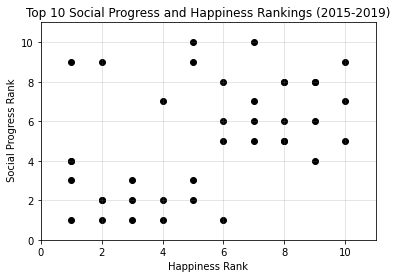

In [16]:
plt.title("Top 10 Social Progress and Happiness Rankings (2015-2019)")
plt.ylabel(" Social Progress Rank")
plt.xlabel("Happiness Rank")
plt.ylim(0,11)
plt.xlim(0,11)
plt.grid(True, linestyle="-", which="major", color="gray", alpha=0.25)

plt.scatter(x_values, y_values, color="black", marker="o")
plt.show()


In [17]:
#plot_country = ranking_country["Country"].to_list()
#plot_HS_rank = ranking_country["Rank_HS"].to_list()
#plot_SPI_rank = ranking_country["Rank_SPI"].to_list()
#plot_HS_rank
#plot_SPI_rank
#plot_country

In [18]:
#Create variable for list of ranking data
plot_HS_rank = ranking_country["Rank_HS"].to_list()

plot_SPI_rank = ranking_country["Rank_SPI"].to_list()

country = ranking_country["Country"].to_list()


In [19]:
#Create variable to add and inverse the rankings so the smallest number for the ranking displays a larger dot using list comprehension.
#https://www.geeksforgeeks.org/python-adding-two-list-elements/
#display_dot = [plot_HS_rank[i] + plot_SPI_rank[i] for i in range(len(plot_HS_rank))]

display_dot = [float(plot_HS_rank[i]) + float(plot_SPI_rank[i]) for i in range(len(plot_HS_rank))]

#Find reciprocal
#https://www.geeksforgeeks.org/numpy-reciprocal
display_dot_inv = np.reciprocal(display_dot)

#display_dot
#display_dot_inv

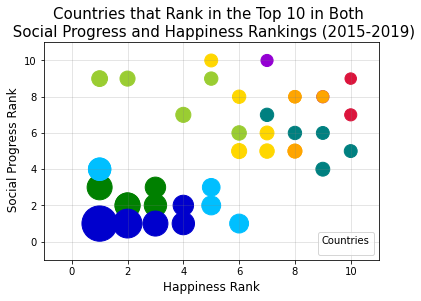

In [20]:
#Scatterplot of the two rankings with cities that rank 1-10 in both.
#https://stackoverflow.com/questions/26139423/plot-different-color-for-different-categorical-levels-using-matplotlib
#https://python-graph-gallery.com/270-basic-bubble-plot/

df = pd.DataFrame(dict(plot_HS_rank=plot_HS_rank, plot_SPI_rank=plot_SPI_rank, country=country, display_dot_inv=display_dot_inv))
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (7,7)

colors = {'Australia':'crimson', 'Canada':'darkviolet', 'Denmark':'green', 'Finland':'deepskyblue', 'Netherlands':'gold', 'New Zealand':'orange', 'Norway':'mediumblue', 'Sweden':'teal', 'Switzerland':'yellowgreen'}
scatter = ax.scatter(df['plot_HS_rank'], df['plot_SPI_rank'], s=df['display_dot_inv']*2500, c=df['country'].apply(lambda x: colors[x]))
legend1 = ax.legend(*scatter.legend_elements(), loc="lower right", title="Countries")

plt.ylim(-1,11)
plt.xlim(-1,11)
plt.title("Countries that Rank in the Top 10 in Both \n Social Progress and Happiness Rankings (2015-2019)", fontsize=15)
plt.ylabel(" Social Progress Rank", fontsize=12)
plt.xlabel("Happiness Rank", fontsize=12)
plt.grid(True, linestyle="-", which="major", color="gray", alpha=0.25)

#plt.savefig("Data/TopTenRanking.png")
plt.show()

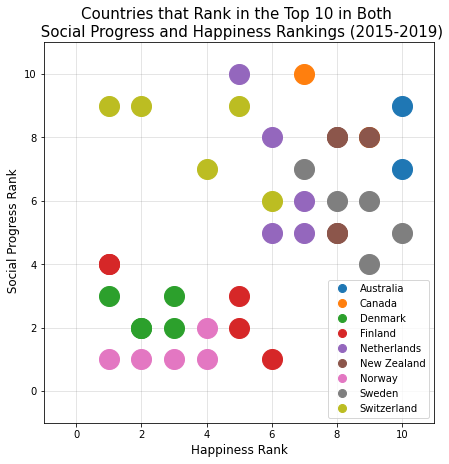

In [21]:
groups = ranking_country.groupby("Country")
colors = {'Australia':'crimson', 'Canada':'darkviolet', 'Denmark':'green', 'Finland':'deepskyblue', 'Netherlands':'gold', 'New Zealand':'orange', 'Norway':'mediumblue', 'Sweden':'teal', 'Switzerland':'yellowgreen'}

for name, group in groups:
    plt.plot(group["Rank_HS"], group["Rank_SPI"], marker="o", markersize=20, linestyle="", label=name,)

plt.rcParams["figure.figsize"] = (7,7)
plt.rcParams["legend.markerscale"] = 0.4

plt.ylim(-1,11)
plt.xlim(-1,11)
plt.title("Countries that Rank in the Top 10 in Both \n Social Progress and Happiness Rankings (2015-2019)", fontsize=15)
plt.ylabel(" Social Progress Rank", fontsize=12)
plt.xlabel("Happiness Rank", fontsize=12)
plt.grid(True, linestyle="-", which="major", color="gray", alpha=0.25)
plt.legend()

#plt.savefig("Data/TopTenRanking-alternate.png")
plt.show()

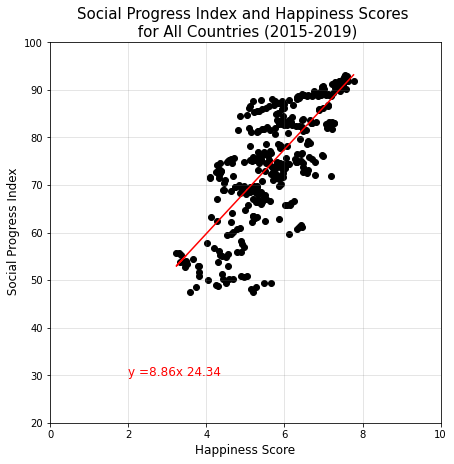

R squared: 0.5932533292668125


In [22]:
#Scatterplot all years 
x_values = totals_df["Score_HS"]
y_values = totals_df["Social Progress Index_SP"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y =" + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.rcParams["figure.figsize"] = (7,7)

plt.title("Social Progress Index and Happiness Scores \n for All Countries (2015-2019)",  fontsize=15)
plt.ylabel(" Social Progress Index",  fontsize=12)
plt.xlabel("Happiness Score",  fontsize=12)
plt.ylim(20,100)
plt.xlim(0,10)
plt.grid(True, linestyle="-", which="major", color="gray", alpha=0.25)
plt.annotate(line_eq, (2,30), fontsize=12, color="red")

plt.scatter(x_values, y_values, color="black", marker="o")
plt.plot(x_values, regress_values, "r-")

#plt.savefig("Data/HP_SPI_scatter.png")

plt.show()

#print r squared
print(f"R squared: {rvalue**2}")

In [23]:
#Group by country
grouped_totals_df = totals_df.groupby(["Country"])
grouped_totals_df.mean()

,Year,Rank_HS,Score_HS,Rank_SPI,Social Progress Index_SP
Country,,,,,
Albania,2017.0,106.400000,4.712600,51.800000,75.192000
Argentina,2017.0,31.200000,6.459400,42.000000,79.426000
Armenia,2017.0,122.800000,4.393200,59.200000,73.300000
Australia,2018.0,10.333333,7.261333,8.333333,91.133333
Austria,2017.0,12.000000,7.142000,15.400000,89.072000
...,...,...,...,...,...
Turkey,2017.0,75.200000,5.415400,85.000000,68.120000
Ukraine,2017.0,127.400000,4.307200,66.400000,71.730000
United Kingdom,2017.0,17.800000,6.910000,18.200000,88.770000


In [24]:
#Converting groupby to a dataframe
averages_df = pd.DataFrame(grouped_totals_df["Rank_HS", "Score_HS", "Rank_SPI", "Social Progress Index_SP"].mean())

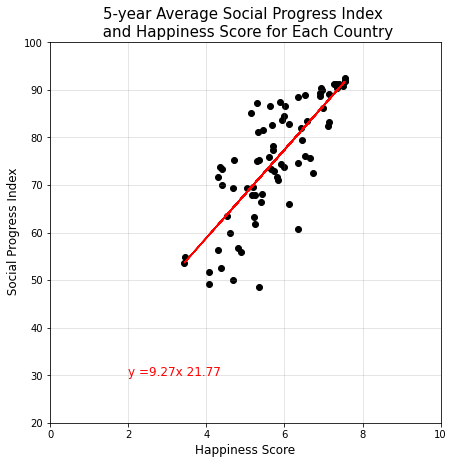

R squared: 0.6199444420732403


In [25]:
#Scatterplot averaged data 
x_values = averages_df["Score_HS"]
y_values = averages_df["Social Progress Index_SP"]

plt.rcParams["figure.figsize"] = (7,7)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y =" + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.title("5-year Average Social Progress Index \n and Happiness Score for Each Country",  fontsize=15)
plt.ylabel(" Social Progress Index",  fontsize=12)
plt.xlabel("Happiness Score",  fontsize=12)
plt.ylim(20,100)
plt.xlim(0,10)
plt.grid(True, linestyle="-", which="major", color="gray", alpha=0.25)
plt.annotate(line_eq, (2,30), fontsize=12, color="red")

plt.scatter(x_values, y_values, color="black", marker="o")
plt.plot(x_values, regress_values, "r-")

#plt.savefig("Data/HP_SPI_5average_scatter.png")

plt.show()

#print r squared
print(f"R squared: {rvalue**2}")

# Analysis of Relationships between Social Progress Indicators and Happiness Score

### Basic Human Needs vs. Happiness Linear Regression

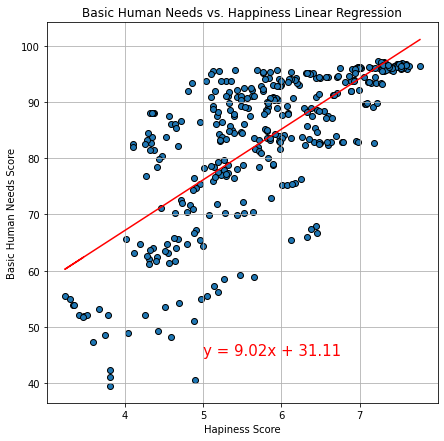

In [26]:
# Add the linear regression equation and line to plot
x_values = project_df['Score_HS']
y_values = project_df['Basic Human Needs_SP']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors= "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,45),fontsize=15,color="red")

# Labels
plt.title('Basic Human Needs vs. Happiness Linear Regression')
plt.xlabel('Hapiness Score')
plt.ylabel('Basic Human Needs Score')
plt.grid()
plt.show()

In [27]:
score = f"The r value is: {rvalue}"
if rvalue == 0:
    relationship = "none existant"
    strength = ""
else:
    if rvalue > 0:
        relationship = "positive"
    else:
        relationship = "negative"

if abs(rvalue) >= .7:
    strength = "strong"
elif abs(rvalue) >= .5:
    strength = "moderate"
elif abs(rvalue) >= .3 and rvalue != 0:
    strength = "weak"
    
print(f"The r value is: {rvalue}.  This is a {strength} {relationship} relationship")

The r value is: 0.7203380281808829.  This is a strong positive relationship


### Foundations of Wellbeing vs Happiness Linear Regression

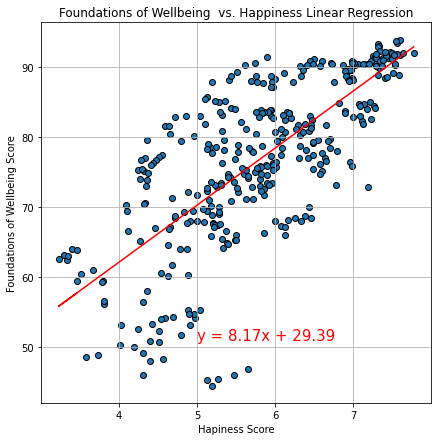

In [28]:
# Add the linear regression equation and line to plot
x_values = project_df['Score_HS']
y_values = project_df['Foundations of Wellbeing_SP']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors= "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,51),fontsize=15,color="red")

# Labels
plt.title('Foundations of Wellbeing  vs. Happiness Linear Regression')
plt.xlabel('Hapiness Score')
plt.ylabel('Foundations of Wellbeing Score')
plt.grid()
plt.show()

In [29]:
score = f"The r value is: {rvalue}"
if rvalue == 0:
    relationship = "none existant"
    strength = ""
else:
    if rvalue > 0:
        relationship = "positive"
    else:
        relationship = "negative"

if abs(rvalue) >= .7:
    strength = "strong"
elif abs(rvalue) >= .5:
    strength = "moderate"
elif abs(rvalue) >= .3 and rvalue != 0:
    strength = "weak"
    
print(f"The r value is: {rvalue}.  This is a {strength} {relationship} relationship")

The r value is: 0.7375901602991619.  This is a strong positive relationship


### Opportunity vs. Happiness Linear Regression

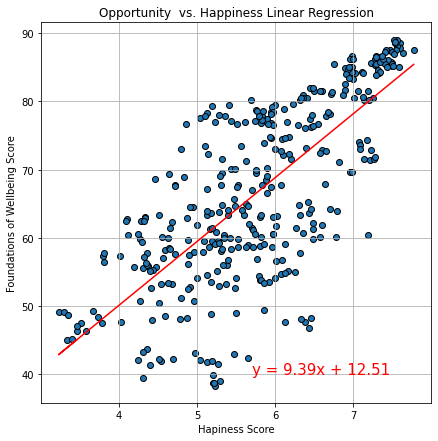

In [30]:
# Add the linear regression equation and line to plot
x_values = project_df['Score_HS']
y_values = project_df['Opportunity_SP']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors= "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.7,40),fontsize=15,color="red")

# Labels
plt.title('Opportunity  vs. Happiness Linear Regression')
plt.xlabel('Hapiness Score')
plt.ylabel('Foundations of Wellbeing Score')
plt.grid()
plt.show()

In [31]:
score = f"The r value is: {rvalue}"
if rvalue == 0:
    relationship = "none existant"
    strength = ""
else:
    if rvalue > 0:
        relationship = "positive"
    else:
        relationship = "negative"

if abs(rvalue) >= .7:
    strength = "strong"
elif abs(rvalue) >= .5:
    strength = "moderate"
elif abs(rvalue) >= .3 and rvalue != 0:
    strength = "weak"
    
print(f"The r value is: {rvalue}.  This is a {strength} {relationship} relationship")

The r value is: 0.7422322467871909.  This is a strong positive relationship


# Finding Sub-metric with Strongest Correlation to Happiness Score

In [32]:
# Create lists for storage of information
sub_metric_list = []
rvalue_list = []

# Select only columns relating to Social Progress Indicators
submetric_df = project_df.iloc[:, 22:84]

# Iterate through the submetric data frame and store rvalues and submetric label for each
for column in submetric_df:
    submetric_string = column[:-3]
    x_values = project_df['Score_HS']
    y_values = project_df[column]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    sub_metric_list.append(submetric_string)
    rvalue_list.append(rvalue)
    
# Store lists in a dictionary
submetric_results_dict = {
    'Sub Metric' : sub_metric_list,
    'R Value' : rvalue_list
}

# Create a dataframe with the dictionary
submetric_results_df = pd.DataFrame(data = submetric_results_dict)

### Positive Relationship Results

In [33]:
positive_results_df = submetric_results_df.loc[submetric_results_df['R Value'] >= 0]
weak_pos_results_df = positive_results_df.sort_values(by=['R Value'])
strong_pos_results_df = positive_results_df.sort_values(by=['R Value'], ascending = False)

<b>Strongest Positive Indicators of Happiness</b>

In [34]:
strong_pos_results_df.head()

,Sub Metric,R Value
38,Life expectancy at 60 (years),0.774387
4,Access to Information and Communications,0.759601
5,Health and Wellness,0.754358
56,Acceptance of gays and lesbians (0=low; 100=high),0.753401
8,Personal Freedom and Choice,0.746031


<b>Weakest Positive Indicators of Happiness</b>

In [35]:
weak_pos_results_df.head()

,Sub Metric,R Value
39,Greenhouse gas emissions (total CO2 equivalents),0.119274
41,Biome protection,0.215574
57,Quality weighted universities (points),0.282349
45,Freedom of religion (0=no freedom; 4=full free...,0.324060
34,Mobile telephone subscriptions (subscriptions/...,0.336811


### Negative Relationship Results

In [36]:
negative_results_df = submetric_results_df.loc[submetric_results_df['R Value'] < 0]
strong_neg_results_df = negative_results_df.sort_values(by=['R Value'])
weak_neg_results_df = negative_results_df.sort_values(by=['R Value'], ascending = False)

<b>Strongest Negative Indicators of Happiness</b>

In [37]:
strong_neg_results_df.head()

,Sub Metric,R Value
21,Household air pollution attributable deaths (d...,-0.757515
18,Populations using unsafe or unimproved sanitat...,-0.711743
48,Vulnerable employment (% of employees),-0.672860
17,Populations using unsafe or unimproved water s...,-0.664992
13,Child stunting (% of children),-0.655595


<b>Weakest Negative Indicators of Happiness</b>

In [38]:
weak_neg_results_df.head()

,Sub Metric,R Value
25,"Homicide rate (deaths/100,000)",-0.070222
24,Perceived criminality (1=low; 5=high),-0.352443
50,Early marriage (% of women),-0.384361
27,Women with no schooling,-0.410188
55,Discrimination and violence against minorities...,-0.417835


# Analysis of Relationships between Happiness Indicators and Social Progress Score

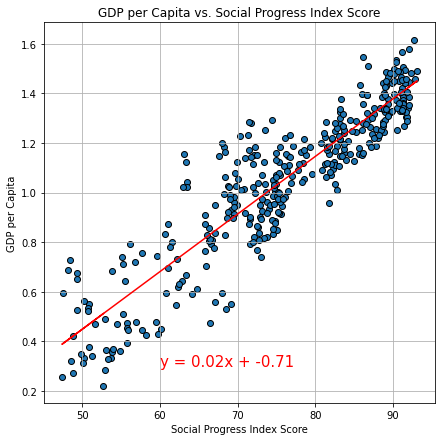

In [40]:
# Add the linear regression equation and line to plot
x_values = project_df['Social Progress Index_SP']
y_values = project_df['GDP per capita_HS']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors= "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60, .3),fontsize=15,color="red")

# Labels
plt.title('GDP per Capita vs. Social Progress Index Score')
plt.xlabel('Social Progress Index Score')
plt.ylabel('GDP per Capita')
plt.grid()
plt.show()

In [41]:
score = f"The r value is: {rvalue}"
if rvalue == 0:
    relationship = "none existant"
    strength = ""
else:
    if rvalue > 0:
        relationship = "positive"
    else:
        relationship = "negative"

if abs(rvalue) >= .7:
    strength = "strong"
elif abs(rvalue) >= .5:
    strength = "moderate"
elif abs(rvalue) >= .3 and rvalue != 0:
    strength = "weak"
    
print(f"The r value is: {rvalue}.  This is a {strength} {relationship} relationship")

The r value is: 0.911455180675344.  This is a strong positive relationship
